In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from math import floor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import plotly.express as plx
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
for dirpath, dirname, filenames in os.walk('../Customer Segmentation'):
    for filename in filenames:
        file_path = os.path.join(dirpath,filename)
file_path

'../Customer Segmentation/input/marketing_campaign.csv'

In [3]:
df = pd.read_csv(file_path,sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# EDA

In [4]:
#shape of the dataset
df.shape

(2240, 29)

In [5]:
#check duplicates
df["ID"].duplicated().sum()

0

In [6]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Column '{col}' has {df[col].isnull().sum()} missing values")

Column 'Income' has 24 missing values


### Imputing missing values

In [7]:
df['Income'] = df['Income'].fillna(df.groupby('Education')['Income'].transform("mean"))

In [8]:
present = 0  #this is equal to false
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Column '{col}' has {df[col].isnull().sum()} missing values")
        present = 1
if not present:
        print("No missing values are present in the dataset")

No missing values are present in the dataset


### Feature Engineering

In [9]:
df.set_index("ID").sort_index()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0
1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,3,11,1
9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,3,11,0
13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,3,11,0
17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,2,10,0,1,4,1,1,0,3,7,0,0,0,0,0,0,3,11,0
11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
11187,1978,Basic,Single,26487.0,1,0,20-05-2013,23,2,8,10,12,14,23,3,2,1,3,5,0,0,0,0,0,0,3,11,0


In [10]:
df["Age"] = int(pd.datetime.now().year) - df["Year_Birth"]


In [11]:
print("Columns with string data type are:")
for col in df.columns:
   if df[col].dtype == object:
       print(col)

Columns with string data type are:
Education
Marital_Status
Dt_Customer


In [12]:
df_edu = pd.DataFrame(df["Education"].value_counts().reset_index())
df_edu.columns = ['Education',"Count"]
df_edu

,Education,Count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


In [13]:
df["Education"] = np.where(df["Education"] == "2n Cycle", "Master", df["Education"])
df_edu = pd.DataFrame(df["Education"].value_counts().reset_index())
df_edu.columns = ['Education',"Count"]
df_edu


,Education,Count
0,Graduation,1127
1,Master,573
2,PhD,486
3,Basic,54


In [14]:
fig = plx.bar(df_edu, x = "Education", y ="Count" , color = "Education")
fig.update_layout(width=800, height=400, title='Education')
fig.show()

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40


In [16]:
df["Marital_Status"]  = np.where(df["Marital_Status"].isin(['Together', 'Married']),'Relationship','Single')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Relationship,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40


In [17]:
df_Mar = df["Marital_Status"].value_counts().reset_index()
df_Mar.columns = ['Marital_Status', 'Count']
df_Mar

,Marital_Status,Count
0,Relationship,1444
1,Single,796


In [18]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2
2,4141,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0
3,6182,1984,Graduation,Relationship,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1
4,5324,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,1


In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)

In [20]:
last_enrollment = pd.to_datetime(df['Dt_Customer'].max(), utc=False)
df['Days_Enrolled'] = (last_enrollment-df['Dt_Customer']).dt.days
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Days_Enrolled
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2,125
2,4141,1965,Graduation,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,0,472
3,6182,1984,Graduation,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1,65
4,5324,1981,PhD,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,1,321


In [21]:
df.drop(columns = ['Year_Birth', 'Kidhome', 'Teenhome', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], inplace=True)

In [22]:
df.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Days_Enrolled
0,5524,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,971
1,2174,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,125
2,4141,Graduation,Relationship,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,472
3,6182,Graduation,Relationship,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,65
4,5324,PhD,Relationship,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,321


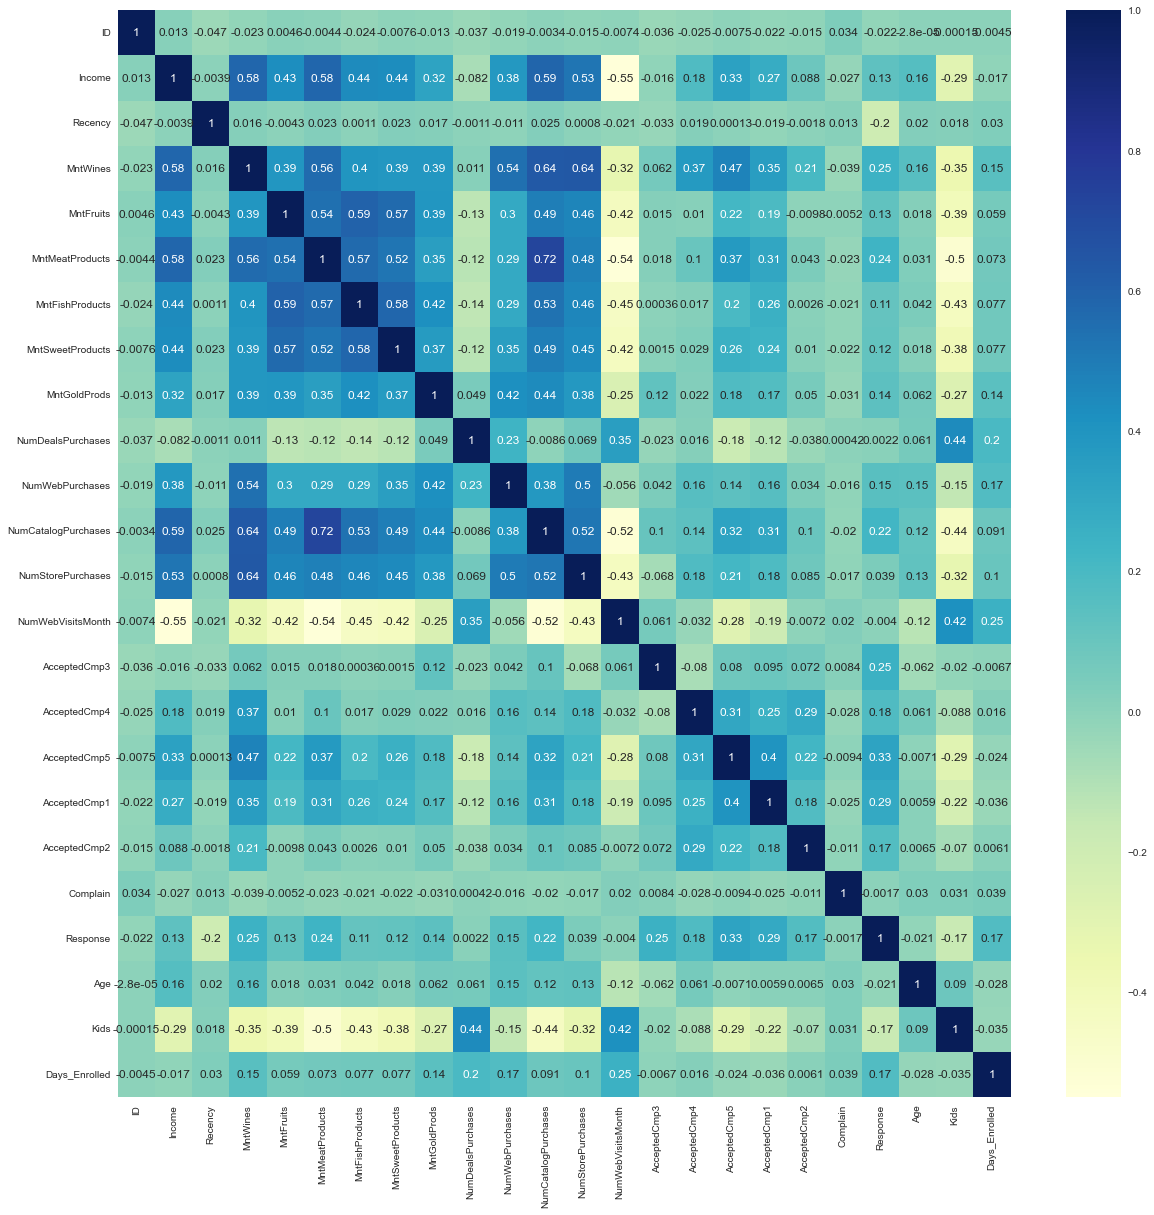

In [23]:
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [24]:
df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [25]:
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

In [26]:
df['Recency_'] = df['Recency']/14
df['Recency_'] = df['Recency_'].apply(lambda x: floor(x))

In [27]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Days_Enrolled,Total_Spend,Recency_
0,5524,Graduation,Single,58138.0,58,3,8,10,4,7,0,0,0,0,0,0,1,64,0,971,1617,4
1,2174,Graduation,Single,46344.0,38,2,1,1,2,5,0,0,0,0,0,0,0,67,2,125,27,2
2,4141,Graduation,Relationship,71613.0,26,1,8,2,10,4,0,0,0,0,0,0,0,56,0,472,776,1
3,6182,Graduation,Relationship,26646.0,26,2,2,0,4,6,0,0,0,0,0,0,0,37,1,65,53,1
4,5324,PhD,Relationship,58293.0,94,5,5,3,6,5,0,0,0,0,0,0,0,40,1,321,422,6


In [28]:
df_Recency = df['Recency_'].value_counts().reset_index()
df_Recency.columns = ['Recency', 'Count']

In [29]:
fig = plx.bar(df_Recency,
            x='Recency',
            y='Count',
            color='Recency')
fig.update_layout(width=800, height=400, title='Recency (x14 days) ')
fig.show()

In [30]:
df['Recency_'] = df['Recency_'].apply(lambda x : str(x))

In [31]:
df.drop(columns='Recency',inplace = True)

In [32]:
print(f"The youngest customer is {df['Age'].min()} years old and oldest customer is {df['Age'].max()} years old")

The youngest customer is 25 years old and oldest customer is 128 years old


In [33]:
df["Coupons_accepted"]=  df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [34]:
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebVisitsMonth'], inplace=True)

In [35]:
df.rename(columns={'NumStorePurchases':'Store_Purchases'}, inplace=True)
df['Non_Store_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']

In [36]:
df['Total_Purchases'] = df['Store_Purchases']+df['Non_Store_Purchases']
df['Store_Purchases_Pct'] = df['Store_Purchases']/df['Total_Purchases']
df['Non_Store_Purchases_Pct'] = 1-df['Store_Purchases_Pct']
df['Customer_Type'] = np.where(df['Store_Purchases_Pct'] >= 0.5, "Offline", "Online")

In [37]:
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,Store_Purchases,Complain,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Non_Store_Purchases,Total_Purchases,Store_Purchases_Pct,Non_Store_Purchases_Pct,Customer_Type
0,5524,Graduation,Single,58138.0,3,8,10,4,0,64,0,971,1617,4,1,18,22,0.181818,0.818182,Online
1,2174,Graduation,Single,46344.0,2,1,1,2,0,67,2,125,27,2,0,2,4,0.500000,0.500000,Offline
2,4141,Graduation,Relationship,71613.0,1,8,2,10,0,56,0,472,776,1,0,10,20,0.500000,0.500000,Offline
3,6182,Graduation,Relationship,26646.0,2,2,0,4,0,37,1,65,53,1,0,2,6,0.666667,0.333333,Offline
4,5324,PhD,Relationship,58293.0,5,5,3,6,0,40,1,321,422,6,0,8,14,0.428571,0.571429,Online


In [38]:
df.drop(columns=['Store_Purchases_Pct', 'Non_Store_Purchases_Pct', 'Non_Store_Purchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Store_Purchases'], inplace=True)
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Complain,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,Customer_Type
0,5524,Graduation,Single,58138.0,3,0,64,0,971,1617,4,1,22,Online
1,2174,Graduation,Single,46344.0,2,0,67,2,125,27,2,0,4,Offline
2,4141,Graduation,Relationship,71613.0,1,0,56,0,472,776,1,0,20,Offline
3,6182,Graduation,Relationship,26646.0,2,0,37,1,65,53,1,0,6,Offline
4,5324,PhD,Relationship,58293.0,5,0,40,1,321,422,6,0,14,Online


In [39]:
trace_list = ['Age', 'NumDealsPurchases','Income', 'Coupons_accepted', 'Total_Purchases', 'Total_Spend']

In [40]:
trace0 = go.Box(
    y=df['Income'],
    name='Income'
)

trace1 = go.Box(
    y=df['Age'],
    name='Age'
)

trace2 = go.Box(
    y=df['NumDealsPurchases'],
    name='Deals Purchases'
)

trace3 = go.Box(
    y=df['Total_Spend'],
    name='Total Spend'
)

trace4 = go.Box(
    y=df['Coupons_accepted'],
    name='Coupons Accepted'
)

trace5 = go.Box(
    y=df['Total_Purchases'],
    name='Total Purchases'
)



fig = make_subplots(rows=2, cols=3)

fig.append_trace(trace0, row = 1, col = 1)
fig.append_trace(trace1, row = 1, col = 2)
fig.append_trace(trace2, row = 1, col = 3)
fig.append_trace(trace3, row = 2, col = 1)
fig.append_trace(trace4, row = 2, col = 2)
fig.append_trace(trace5, row = 2, col = 3)

fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')

fig.show()

In [41]:

# for row in range(2):
#     for col in range(3):
#         for x in trace_list:
#             trace = go.Box( y=df[x], name=x)
#             fig = make_subplots(rows= 2, cols= 3)
#             fig.append_trace(trace, row = row, col = col)
#             fig.update_layout(width=800, height=400, title='Box Plot to check for outliers')
#             fig.show()

## Remove outliers

In [42]:
rows_before = df.shape[0]
df = df[(df['Age'] < 80) & (df['Income'] < 160000)]
df_copy = df
df_copy = df_copy[(df_copy['Age'] < 80) & (df_copy['Income'] < 160000)]
rows_after = df.shape[0]
print(f"The number of rows removed by removing the outliers is {rows_before-rows_after}")

The number of rows removed by removing the outliers is 8


In [43]:
df['Age'] = np.where(df['Age'] <= 30, ('(0,30]'), np.where(df['Age'] <= 40, ('(30,40]'),np.where(df['Age'] <= 50, ('(40,50]'),np.where(df['Age'] <= 60, ('(50,60]'),np.where(df['Age'] <= 70, ('(60,70]'),('70 and above'))))))
df

,ID,Education,Marital_Status,Income,NumDealsPurchases,Complain,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,Customer_Type
0,5524,Graduation,Single,58138.0,3,0,"(60,70]",0,971,1617,4,1,22,Online
1,2174,Graduation,Single,46344.0,2,0,"(60,70]",2,125,27,2,0,4,Offline
2,4141,Graduation,Relationship,71613.0,1,0,"(50,60]",0,472,776,1,0,20,Offline
3,6182,Graduation,Relationship,26646.0,2,0,"(30,40]",1,65,53,1,0,6,Offline
4,5324,PhD,Relationship,58293.0,5,0,"(30,40]",1,321,422,6,0,14,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Relationship,61223.0,2,0,"(50,60]",1,541,1341,3,0,16,Online
2236,4001,PhD,Relationship,64014.0,7,0,70 and above,3,61,444,4,1,15,Online
2237,7270,Graduation,Single,56981.0,1,0,"(30,40]",0,315,1241,6,1,18,Offline
2238,8235,Master,Relationship,69245.0,2,0,"(60,70]",1,316,843,0,0,21,Online


In [44]:
del df['Customer_Type']
del df['Complain']

In [45]:
new_df = df.copy()
new_df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases
0,5524,Graduation,Single,58138.0,3,"(60,70]",0,971,1617,4,1,22
1,2174,Graduation,Single,46344.0,2,"(60,70]",2,125,27,2,0,4
2,4141,Graduation,Relationship,71613.0,1,"(50,60]",0,472,776,1,0,20
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,65,53,1,0,6
4,5324,PhD,Relationship,58293.0,5,"(30,40]",1,321,422,6,0,14


In [46]:
df.set_index('ID',inplace=True)
df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases
ID,,,,,,,,,,,
5524,Graduation,Single,58138.0,3,"(60,70]",0,971,1617,4,1,22
2174,Graduation,Single,46344.0,2,"(60,70]",2,125,27,2,0,4
4141,Graduation,Relationship,71613.0,1,"(50,60]",0,472,776,1,0,20
6182,Graduation,Relationship,26646.0,2,"(30,40]",1,65,53,1,0,6
5324,PhD,Relationship,58293.0,5,"(30,40]",1,321,422,6,0,14


Scaling

In [47]:
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Income', 'NumDealsPurchases', 'Kids', 'Days_Enrolled', 'Total_Spend', 'Coupons_accepted', 'Total_Purchases']


In [48]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])

In [49]:
df.reset_index(inplace=True)

In [50]:
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases
0,5524,Graduation,Single,0.297121,0.353664,"(60,70]",-1.266161,1.976895,1.684059,4,0.619663,1.314429
1,2174,Graduation,Single,-0.260347,-0.168757,"(60,70]",1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158
2,4141,Graduation,Relationship,0.934044,-0.691179,"(50,60]",-1.266161,-0.171754,0.284233,1,-0.502063,1.036475
3,6182,Graduation,Relationship,-1.191412,-0.168757,"(30,40]",0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204
4,5324,PhD,Relationship,0.304447,1.398507,"(30,40]",0.064381,-0.821947,-0.304992,6,-0.502063,0.202613


Encoding

In [51]:
df.reset_index(inplace=True)
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases
0,0,5524,Graduation,Single,0.297121,0.353664,"(60,70]",-1.266161,1.976895,1.684059,4,0.619663,1.314429
1,1,2174,Graduation,Single,-0.260347,-0.168757,"(60,70]",1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158
2,2,4141,Graduation,Relationship,0.934044,-0.691179,"(50,60]",-1.266161,-0.171754,0.284233,1,-0.502063,1.036475
3,3,6182,Graduation,Relationship,-1.191412,-0.168757,"(30,40]",0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204
4,4,5324,PhD,Relationship,0.304447,1.398507,"(30,40]",0.064381,-0.821947,-0.304992,6,-0.502063,0.202613


In [52]:
one_hot_encoder = OneHotEncoder() 
data = pd.DataFrame(one_hot_encoder.fit_transform(df[['Age', 'Recency_']]).toarray())
data = data.reset_index()
df = pd.merge(left = df, right = data, on = 'index')
df = df.drop(columns= ['Age'])

In [53]:
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,5524,Graduation,Single,0.297121,0.353664,-1.266161,1.976895,1.684059,4,0.619663,1.314429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2174,Graduation,Single,-0.260347,-0.168757,1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,4141,Graduation,Relationship,0.934044,-0.691179,-1.266161,-0.171754,0.284233,1,-0.502063,1.036475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182,Graduation,Relationship,-1.191412,-0.168757,0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5324,PhD,Relationship,0.304447,1.398507,0.064381,-0.821947,-0.304992,6,-0.502063,0.202613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Recency_']

In [55]:
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])

In [56]:
df.drop(columns=[df.columns[0]], inplace=True)
df.set_index('ID', inplace=True)

In [57]:
df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13
ID,,,,,,,,,,,,,,,,,,,,,,,,
5524,1,1,0.297121,0.353664,-1.266161,1.976895,1.684059,4,0.619663,1.314429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2174,1,1,-0.260347,-0.168757,1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4141,1,0,0.934044,-0.691179,-1.266161,-0.171754,0.284233,1,-0.502063,1.036475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6182,1,0,-1.191412,-0.168757,0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5324,3,0,0.304447,1.398507,0.064381,-0.821947,-0.304992,6,-0.502063,0.202613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Clustering

In [58]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df)
pred = kmeans.predict(df)
df['Cluster'] = pred+1

In [59]:
df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Cluster
ID,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1,1,0.297121,0.353664,-1.266161,1.976895,1.684059,4,0.619663,1.314429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
2174,1,1,-0.260347,-0.168757,1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4141,1,0,0.934044,-0.691179,-1.266161,-0.171754,0.284233,1,-0.502063,1.036475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6182,1,0,-1.191412,-0.168757,0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5324,3,0,0.304447,1.398507,0.064381,-0.821947,-0.304992,6,-0.502063,0.202613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [60]:
df.reset_index('ID',inplace= True)
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Cluster
0,5524,1,1,0.297121,0.353664,-1.266161,1.976895,1.684059,4,0.619663,1.314429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,2174,1,1,-0.260347,-0.168757,1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
2,4141,1,0,0.934044,-0.691179,-1.266161,-0.171754,0.284233,1,-0.502063,1.036475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,6182,1,0,-1.191412,-0.168757,0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,5324,3,0,0.304447,1.398507,0.064381,-0.821947,-0.304992,6,-0.502063,0.202613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [62]:
df_ = pd.merge(new_df, df[['ID', 'Cluster']], how='left')
df_['Cluster'] = df_['Cluster'].astype('str')
df_['Cluster'] = np.where(df_['Cluster'] == '1', "Cluster 1", np.where(df_['Cluster'] == '2', "Cluster 2", np.where(df_['Cluster'] == '3', "Cluster 3", "Cluster 4")))

In [63]:
df['Cluster'] = df['Cluster'].astype('str')
categorized_df = df
categorized_df['Cluster'] = np.where(categorized_df['Cluster'] == '1', "Cluster 1", np.where(categorized_df['Cluster'] == '2', "Cluster 2", np.where(categorized_df['Cluster'] == '3', "Cluster 3", "Cluster 4")))
categorized_df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Cluster
0,5524,1,1,0.297121,0.353664,-1.266161,1.976895,1.684059,4,0.619663,1.314429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Cluster 4
1,2174,1,1,-0.260347,-0.168757,1.394923,-1.665905,-0.962460,2,-0.502063,-1.187158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cluster 3
2,4141,1,0,0.934044,-0.691179,-1.266161,-0.171754,0.284233,1,-0.502063,1.036475,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Cluster 2
3,6182,1,0,-1.191412,-0.168757,0.064381,-1.924260,-0.919184,1,-0.502063,-0.909204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Cluster 3
4,5324,3,0,0.304447,1.398507,0.064381,-0.821947,-0.304992,6,-0.502063,0.202613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Cluster 1


In [64]:
df_visualize = pd.DataFrame(categorized_df['Cluster'].value_counts()).reset_index()
df_visualize.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_visualize['Cluster'], values=df_visualize['Count'], hole=.3)])
fig.update_layout(width=800, height=400, title='Cluster')
fig.show()

In [65]:
fig = plx.scatter(categorized_df, x="Income", y="Total_Spend",
                 color="Cluster",
                 hover_data=['Total_Spend', 'Income', 'Cluster'])

fig.update_layout(
    title="Spend vs Income Plot",
    xaxis_title = "Spend",
    yaxis_title = "Income",
    width = 900, height=600
)

fig.show()

Cluster 2 and Cluster 3 are high & income high spend segment whereas Cluster 1 and cluster 4 are low income and low spend segment.

In [66]:
df_plot = df_[['Age','ID','Cluster']].groupby(['Age','Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Number of Customers"}, inplace=True)
df_plot

,Age,Cluster,Number of Customers
0,"(0,30]",Cluster 1,7
1,"(0,30]",Cluster 2,12
2,"(0,30]",Cluster 3,9
3,"(0,30]",Cluster 4,15
4,"(30,40]",Cluster 1,98
5,"(30,40]",Cluster 2,54
6,"(30,40]",Cluster 3,130
7,"(30,40]",Cluster 4,59
8,"(40,50]",Cluster 1,194
9,"(40,50]",Cluster 2,85


In [67]:
fig = plx.bar(df_plot, x="Age", y="Number of Customers",
             color='Cluster', barmode='group', width = 800,
             height=400)
fig.show()

Most of the customers are in the age group 41-50 and then between 51-60. There are'nt many customers belonging to age less than 30 maybe because the company is focused more on middle/old aged customers.

Moreover, in all the age group, majority of the customers belong to Cluster 4 and Cluster 1 except for the customers above 60 years of age where Cluster 3 forms the majority.

In [68]:
df_plot = df_[['Marital_Status', 'Cluster', 'ID']].groupby(['Marital_Status', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = plx.bar(df_plot, x="Marital_Status", y="Count of Customers",
             color='Cluster', barmode='group', width= 800,
             height=400)
fig.show()

Customers that shop are mostly in relationhip. This is probably because most of its customers are above 30

In [69]:
df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases,Cluster
0,5524,Graduation,Single,58138.0,3,"(60,70]",0,971,1617,4,1,22,Cluster 4
1,2174,Graduation,Single,46344.0,2,"(60,70]",2,125,27,2,0,4,Cluster 3
2,4141,Graduation,Relationship,71613.0,1,"(50,60]",0,472,776,1,0,20,Cluster 2
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,65,53,1,0,6,Cluster 3
4,5324,PhD,Relationship,58293.0,5,"(30,40]",1,321,422,6,0,14,Cluster 1


In [70]:
new_df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,Recency_,Coupons_accepted,Total_Purchases
0,5524,Graduation,Single,58138.0,3,"(60,70]",0,971,1617,4,1,22
1,2174,Graduation,Single,46344.0,2,"(60,70]",2,125,27,2,0,4
2,4141,Graduation,Relationship,71613.0,1,"(50,60]",0,472,776,1,0,20
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,65,53,1,0,6
4,5324,PhD,Relationship,58293.0,5,"(30,40]",1,321,422,6,0,14


In [71]:
df_plot = df_[['Cluster', 'Income']].groupby(['Cluster']).agg({'Income': 'mean'})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Income":"Mean Income"}, inplace=True)

df_plot_ = df_[['Cluster', 'Total_Spend']].groupby(['Cluster']).agg({'Total_Spend': 'mean'})
df_plot_.reset_index(inplace=True)
df_plot_.rename(columns={"Total_Spend":"Mean Spend"}, inplace=True)


trace1 = go.Bar(
    x=df_plot['Cluster'],
    y=df_plot['Mean Income'],
    name='Mean Income of Clusters'
)
trace2 = go.Bar(
    x=df_plot_['Cluster'],
    y=df_plot_['Mean Spend'],
    name='Mean Spend of Cluster'
)

fig = make_subplots(rows=1, cols=2, shared_xaxes=True)

fig.append_trace(trace1, row = 1, col = 1)
fig.append_trace(trace2, row = 1, col = 2)

fig.update_layout(width=900, height=500, title='Mean Income & Spend')

fig.show()

In [72]:
df_plot = df_[['Education', 'Cluster', 'ID']].groupby(['Education', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = plx.bar(df_plot, x="Education", y="Count of Customers",
             color='Cluster', barmode='group', width = 800,
             height=400)
fig.update_layout(title="Education")
fig.show()

when you dont have an education background, your income is either really low or really high

In [75]:
df_plot = df_[['Total_Purchases', 'Cluster', 'ID']].groupby(['Cluster']).agg({"ID":"count", "Total_Purchases":"sum"})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Total_Purchases":"Number of Purchases", "ID":"Customers"}, inplace=True)
df_plot['Purchase/Customer'] = df_plot['Number of Purchases']/df_plot['Customers']

fig = plx.bar(df_plot, x="Cluster", y="Purchase/Customer",
             color='Cluster', width = 800,
             height=400)
fig.update_layout(title="Purchase/Customer")
fig.show()

In [77]:
df_plot = df_[['Total_Purchases', 'Cluster', 'Total_Spend']].groupby(['Cluster']).agg({"Total_Spend":"sum", "Total_Purchases":"sum"})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Total_Purchases":"Total Purchases", "Total_Spend":"Spend"}, inplace=True)

df_plot['Spend/Purchase'] = df_plot['Spend']/df_plot['Total Purchases']
fig = plx.bar(df_plot, x="Cluster", y="Spend/Purchase",
             color='Cluster', width = 800,
             height=400)
fig.update_layout(title="Spend/Customer")
fig.show()

In [79]:
df_plot = df_[['NumDealsPurchases', 'Cluster', 'ID']].groupby(['Cluster']).agg({"ID":"count", "NumDealsPurchases":"sum"})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Total Customers", "NumDealsPurchases":"Deals"}, inplace=True)

df_plot['Deals/Customers'] = df_plot['Deals']/df_plot['Total Customers']
fig = plx.bar(df_plot, x="Cluster", y="Deals/Customers",
             color='Cluster', width=800,
             height=400)
fig.update_layout(title="Deals/Customers")
fig.show()

In [80]:
df_plot = df_[['Cluster', 'Days_Enrolled']].groupby(['Cluster']).agg({'Days_Enrolled': 'mean'})
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"Days_Enrolled":"Days since Enrollment"}, inplace=True)

fig = plx.bar(df_plot, x="Cluster", y="Days since Enrollment",
             color='Cluster', width = 800,
             height=400)
fig.update_layout(title="Days since Enrollment")
fig.show()